In [1]:
import pygame
pygame.init()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


(6, 0)

In [2]:
import time

In [3]:
import torch

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import torch
import imageio

In [6]:
import numpy as np

In [7]:
pygame.font.init()

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        '''h_relu = self.fc1(x).clamp(min=0)
        y_pred = self.fc2(h_relu)
        y_pred = self.fc3(y_pred)
        y_pred = self.fc4(y_pred)'''
        #return y_pred
        #return x
        return F.log_softmax(x,dim = 1)
net = Net()
net.load_state_dict(torch.load('Documents/Digits_project/digits_neural_network'))
net.eval()

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [9]:
picture = imageio.imread("Documents/Digits_project/pygame_screenshot.jpeg")
picture = resize(picture, (28,28), mode='constant', anti_aliasing=True)
picture = rgb2gray(picture)

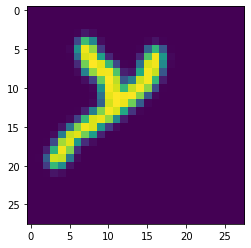

In [10]:
plt.imshow(picture)

In [11]:
Tensor = torch.tensor(picture)

In [12]:
Tensor = Tensor.view(-1,784).float()

In [97]:
Tensor.shape

torch.Size([3, 784])

In [18]:
net(Tensor)

tensor([[-6.2467e+00, -2.1725e+01, -1.6159e+01, -1.0591e+01, -1.5862e+01,
         -4.6774e+00, -1.1370e-02, -2.1189e+01, -1.1121e+01, -1.0592e+01]],
       grad_fn=<LogSoftmaxBackward>)

In [11]:
def main():
    run = True
    clock = pygame.time.Clock()
    clicked = False
    waiting = False
    wrote_smth = False
    while run:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False
            if event.type == pygame.MOUSEBUTTONUP:
                clicked = False
            if event.type == pygame.MOUSEBUTTONDOWN or clicked:
                wrote_smth = True
                if waiting:
                    WIN.fill((0,0,0))
                    waiting = False
                clicked = True
                x,y = pygame.mouse.get_pos()
                #pygame.draw.rect(WIN,(255,255,255),(x,y,50,50))
                pygame.draw.circle(WIN,(255,255,255),(x,y),20)
            keys = pygame.key.get_pressed()
            if keys[pygame.K_SPACE] and wrote_smth:
                pygame.image.save(WIN, "Documents/Digits_project/pygame_screenshot.jpeg")
                picture = imageio.imread("Documents/Digits_project/pygame_screenshot.jpeg")
                picture = resize(picture, (28,28), mode='constant', anti_aliasing=True)
                picture = rgb2gray(picture)
                Tensor = torch.tensor(picture)
                Tensor = Tensor.view(-1,784).float()
                answer = net(Tensor)
                lives_label = main_font.render(f"Predicted number:{torch.argmax(answer)},{torch.max(answer)}", 1, (255,255,255))
                WIN.fill((0,0,0))
                WIN.blit(lives_label, (10, 10))
                waiting = True
                wrote_smth = False
                
                
                
                
        pygame.display.update()

In [ ]:
WIDTH, HEIGHT = 500, 500
WIN = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Drawer")
main_font = pygame.font.SysFont("comicsans", 30)
main()

In [7]:
pygame.mouse.get_pressed

<function pygame.mouse.get_pressed>